# Text mining and basic language comparison

The goal of this project is to analyse the first chapter of the Emile Zola's book, *L'assommoir* in five different languages. This project uses most of the concept that were shown during the python introduction and some guidance is provided if external knowledge is required. The data can be found at `../data/LAssommoir_*txt` for the five studied languages.

In [1]:
from collections import Counter
from collections import OrderedDict

## Read input file and get a list of individual sentence

Given the text file which are provided, some tips are given in order to have a good start.

 1. all file must be openned with `open(filename, 'r', encoding='utf8')` command (with the `encoding` option)
 2. the caracter `\xa0` will have to be replaced by white space in all the text: `line.replace('\xa0',' ')`
 3. the most common caracter to define sentence is `.` but not only: `['.', '…', '...', '?', '¿', '!']` should be taken as possible separators
 
All these step will be done one by one in order to get a list of clean sentence to be studied.
 
**1. Write a function which returns the whole text as a single python string.**

In [2]:
def get_text(filename):
    '''
    Return a single string containing the text of the file 'filename'
    '''
    # Read the file and return a single string
    return text

In [1]:
# test the function an print the first 1000 caracters

**2. Write a function which takes the precedent string and return a list of sentences.**

In [2]:
def get_sentences(text):
    
    # Get the sentences separated by ., ..., ?, !
    seps = ['.', '…', '...', '?', '¿', '!']

    # Loop over the separators and for each of them split the text by it
    
    # Return the list of sentences
    return sentences

In [10]:
# test the function and print the 5 first sentences
# using the following formating:
# i. sentences[i]

**3. Keep only sentences without `\n` and which are not only a ponctuation symbol.**

To indroduce the problem with the french text, print `sentences[40:45]`, what do you notice?

In [8]:
# Print the sentences from the 40th to the 45th

The ponctuation signs which appear in practice are listed below:
```python
symbols = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
           '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
```

Sentences which are only one of these signs have to be disregarded. One can use `str.strip()` function to make sure all special caracters at the begining/end of a line are removed.

In [6]:
def clean_sentences(sentences):
    symbols = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
               '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
    # return a list of striped sentences, disregarding all of the above symbols

In [7]:
# Reprint the sentences from the 40th to the 45th

## Extract a list of words and a list of letters

**4. Write a function which takes the list of clean sentences and return a list of words.**

As before, the main separator of words is the white space, but it is not the only one. We provide a list of caracters which might appear, and which can be changed into white space, so that at the end all words are separated by a white space:
```python
to_be_space = ['…', '...', '?', '!', ';', ',', '-', '—', '–', 
               '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
```

Since we will later perform some statistics on words, we want to be case-insensitive. There is a function to convert any string into a lower case string: `string.casefold()`.

In [9]:
def get_words_from_sentences(sentences):
    to_be_space = ['…', '...', '?', '!', ';', ',', '-', '—', '–', 
                   '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
    # Return a list of words separated by spaces but also by any of the above symbols

In [11]:
# Test the function and print the 10 first words
# using the following formating:
# i. words[i]

**5. Write a function which takes the list of clean sentences and return a list of individual letters.**

Wha we call letter is every symbols (including accents, etc ...) but:

```python
to_disgard = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
              '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
```

One might be careful that we also want to be case-insensitive for letters as well.

In [12]:
def get_letters_from_sentences(sentences):
    to_disgard = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
                  '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
    # Return a list of letters (capital insensitive) assuming that any of the above symbols is not a word

In [13]:
# test the finction and print the 50 first letters

## Counting sentences, words and letters ...

**6. Write a function which return a list of integer corresponding to the number of words per sentences**

In [17]:
def count_words_per_sentences(sentences):
    # return a list which contain the number of words for each sentence
    return 

In [18]:
# Test the function and print the number of words and the associated sentence for the 5 first sentences
# One can use the zip(collection1, collection2) syntax.

**7. In the same way count the number of letters per words**

In [19]:
def count_letters_per_words(words):
    # return a list which contain the number of letters for each word
    return

In [20]:
# Test the function and print the number of letters and the associated word for the 5 first words

**8. Extract the occurence frequency of a given letter or words using `Counter()` function**

The function `Counter()` is part of the module `collections` - which is imported at the begining of the notebook - and return the number of occurence of each element of a list:

In [17]:
l = [1, 2, 3, 1, 3, 1]
counts = Counter(l)
print(counts)

Counter({1: 3, 3: 2, 2: 1})


It can be convenient to convert this object into a dictionnary, since we can sort dictionnary by key or value, thanks to the object `OrderedDict` from `collections` module (we remind you that dictionnary are natively not ordered). We provide the function to sort a dictionnary with decreasing values.

In [18]:
counts = dict(counts)
sorted_counts = OrderedDict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
print('Unsorted: {}'.format(counts))
print('Sorted  : {}'.format(sorted_counts))

Unsorted: {1: 3, 2: 1, 3: 2}
Sorted  : OrderedDict([(1, 3), (3, 2), (2, 1)])


Write two functions which return an ordered dictionnary containing `letter:frequency` and `word:frequency`.

In [21]:
def count_letters_frequency(letters):
    return

def count_words_frequency(words):
    return

In [23]:
# Test the letter function and print the 5 mostly used letters

In [25]:
# Test the word function and the 5 mostly used words

## Explore language comparison

### Wrap up several functions into a single loading fonction

**9. Write a function which perform all the operations above and return a dictionnary with all the raw information needed to perform some statistics.**

We need to to store the list of sentences, the list of words and the list of letters. These three lists allows to call the different function designed before. We propose to store this information into a dictionnary `data`.

In [26]:
def get_clean_sentences(fname):
    return
    
def get_text_data(fname):
    data = {}
    return data 

In [28]:
# Load the dictionnary for french text and print the number of sentences, words and letters

Now, everything is ready to load the five languages and compare their caracteristics using simple statistics:
  + average sentence/word length
  + which letters are the most used?
  + which letters are used is some language and not others?
  + which are the most common words in each language?

In [34]:
# Loading all languages: fr, en, de, it, es 
data_fr = get_text_data('../data/LAssommoir_fr.txt')
data_en = get_text_data('../data/LAssommoir_en.txt')
data_de = get_text_data('../data/LAssommoir_de.txt')
data_it = get_text_data('../data/LAssommoir_it.txt')
data_es = get_text_data('../data/LAssommoir_es.txt')

In [35]:
all_data = [data_fr, data_en, data_de, data_it, data_es]
all_name = ['FR', 'EN', 'DE', 'IT', 'ES']

# Example of averaged sentence length
for n, d in zip(all_name, all_data):
    # Compute and print the average number of word per sentence
    print('{}: {:.2f} words/sentence'.format(n, -99))

FR: -99.00 words/sentence
EN: -99.00 words/sentence
DE: -99.00 words/sentence
IT: -99.00 words/sentence
ES: -99.00 words/sentence


## To go further: more variables and plots

One other intersting variable is the number of unique words as function of the total number of words. Indeed, this allows to probe the basic amount of word duplication. The way to compute it to perform the same counting on a subset of words which increase for each element of the list:

In [26]:
# Count the number of unique words as function ot total words
def count_cumulative_words(words):
    return

# Add this information to a dictionnary
def add_cumul_words(data):
    return

# Add to all data we have so far
for d in all_data:
    add_cumul_words(d)

This part is showing what we can do with `matplotlib`, which is one of the most standard library for plotting in python:

In [39]:
import matplotlib.pyplot as plt

The default style can be tuned using a cosmetic parameters dictionnary, as follow:

In [40]:
# Plot settings
import matplotlib as mpl
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['axes.linewidth'] = 1.0

The following function takes in argument a list of `[name, data]` and compare few distributions of interst for all the data which are passed. This used sub plot feature of matplolib, as well as three types of graphical representation: `hist` (histogram) and `plot` (x *v.s.* y) and `bar` (y *v.s.* label).

In [41]:
def plot_text_data(*args):
    '''
    *arg is a list of [name, data] for each language.
    '''
    
    # Prepare the canvas to plot the results
    plt.figure(figsize=(23, 15))
    grid = plt.GridSpec(2, 3, wspace=0.3, hspace=0.2)
    ax1 = plt.subplot(grid[0, 0])
    ax2 = plt.subplot(grid[0, 1])
    ax3 = plt.subplot(grid[1, :3])
    ax4 = plt.subplot(grid[0, 2])
    
    # plot style
    hist_style = {'density': True, 'histtype': 'step', 'alpha': 0.3, 'linewidth': 5}
    plot_style = {'alpha': 0.3, 'linewidth': 5}
    
    for data in args:
    
        # Unpack text data
        name, text_data = data
        sentences = text_data['sentences']
        words = text_data['words']
        letters = text_data['letters']
        cumul_words = text_data['cumul_words']
        
        # Compute few basic stat
        Nwords = count_words_per_sentences(sentences)
        Nletters = count_letters_per_words(words)
        freq_letters = count_letters_frequency(letters)
    
        # plot sentence length
        ax1.hist(Nwords, bins=range(1, 80, 4), label=name + ' ({})'.format(len(sentences)), **hist_style)
        ax1.set_xlabel('Number of words per sentence')
        ax1.legend()
    
        # plot word length
        ax2.hist(Nletters, bins=range(1, 26), label=name + ' ({})'.format(len(words)), **hist_style)
        ax2.set_xlabel('Number of letters per word')
        ax2.legend()
    
        # plot letter apparition frequency
        x, y = list(freq_letters.keys()), list(freq_letters.values())    
        ax3.bar(x, y, alpha=0.3, label=name)
        ax3.legend()
        
        # plot cumulative number of words
        ax4.plot(cumul_words, label=name, **plot_style)
        ax4.set_xlabel('Number of words')
        ax4.set_ylabel('Number of unique words')
        ax4.legend()

    return

In [44]:
# Based on the function above, plot all data (you can try to think about more interesting plots too!)

This last part compare the 50 most commonly used words in the 5 languages, ranked by decreasing order of occurence. A variation of `bar` style can be used - with horizontal bars: `barh` - instead of the `ax.plot()` command used below.

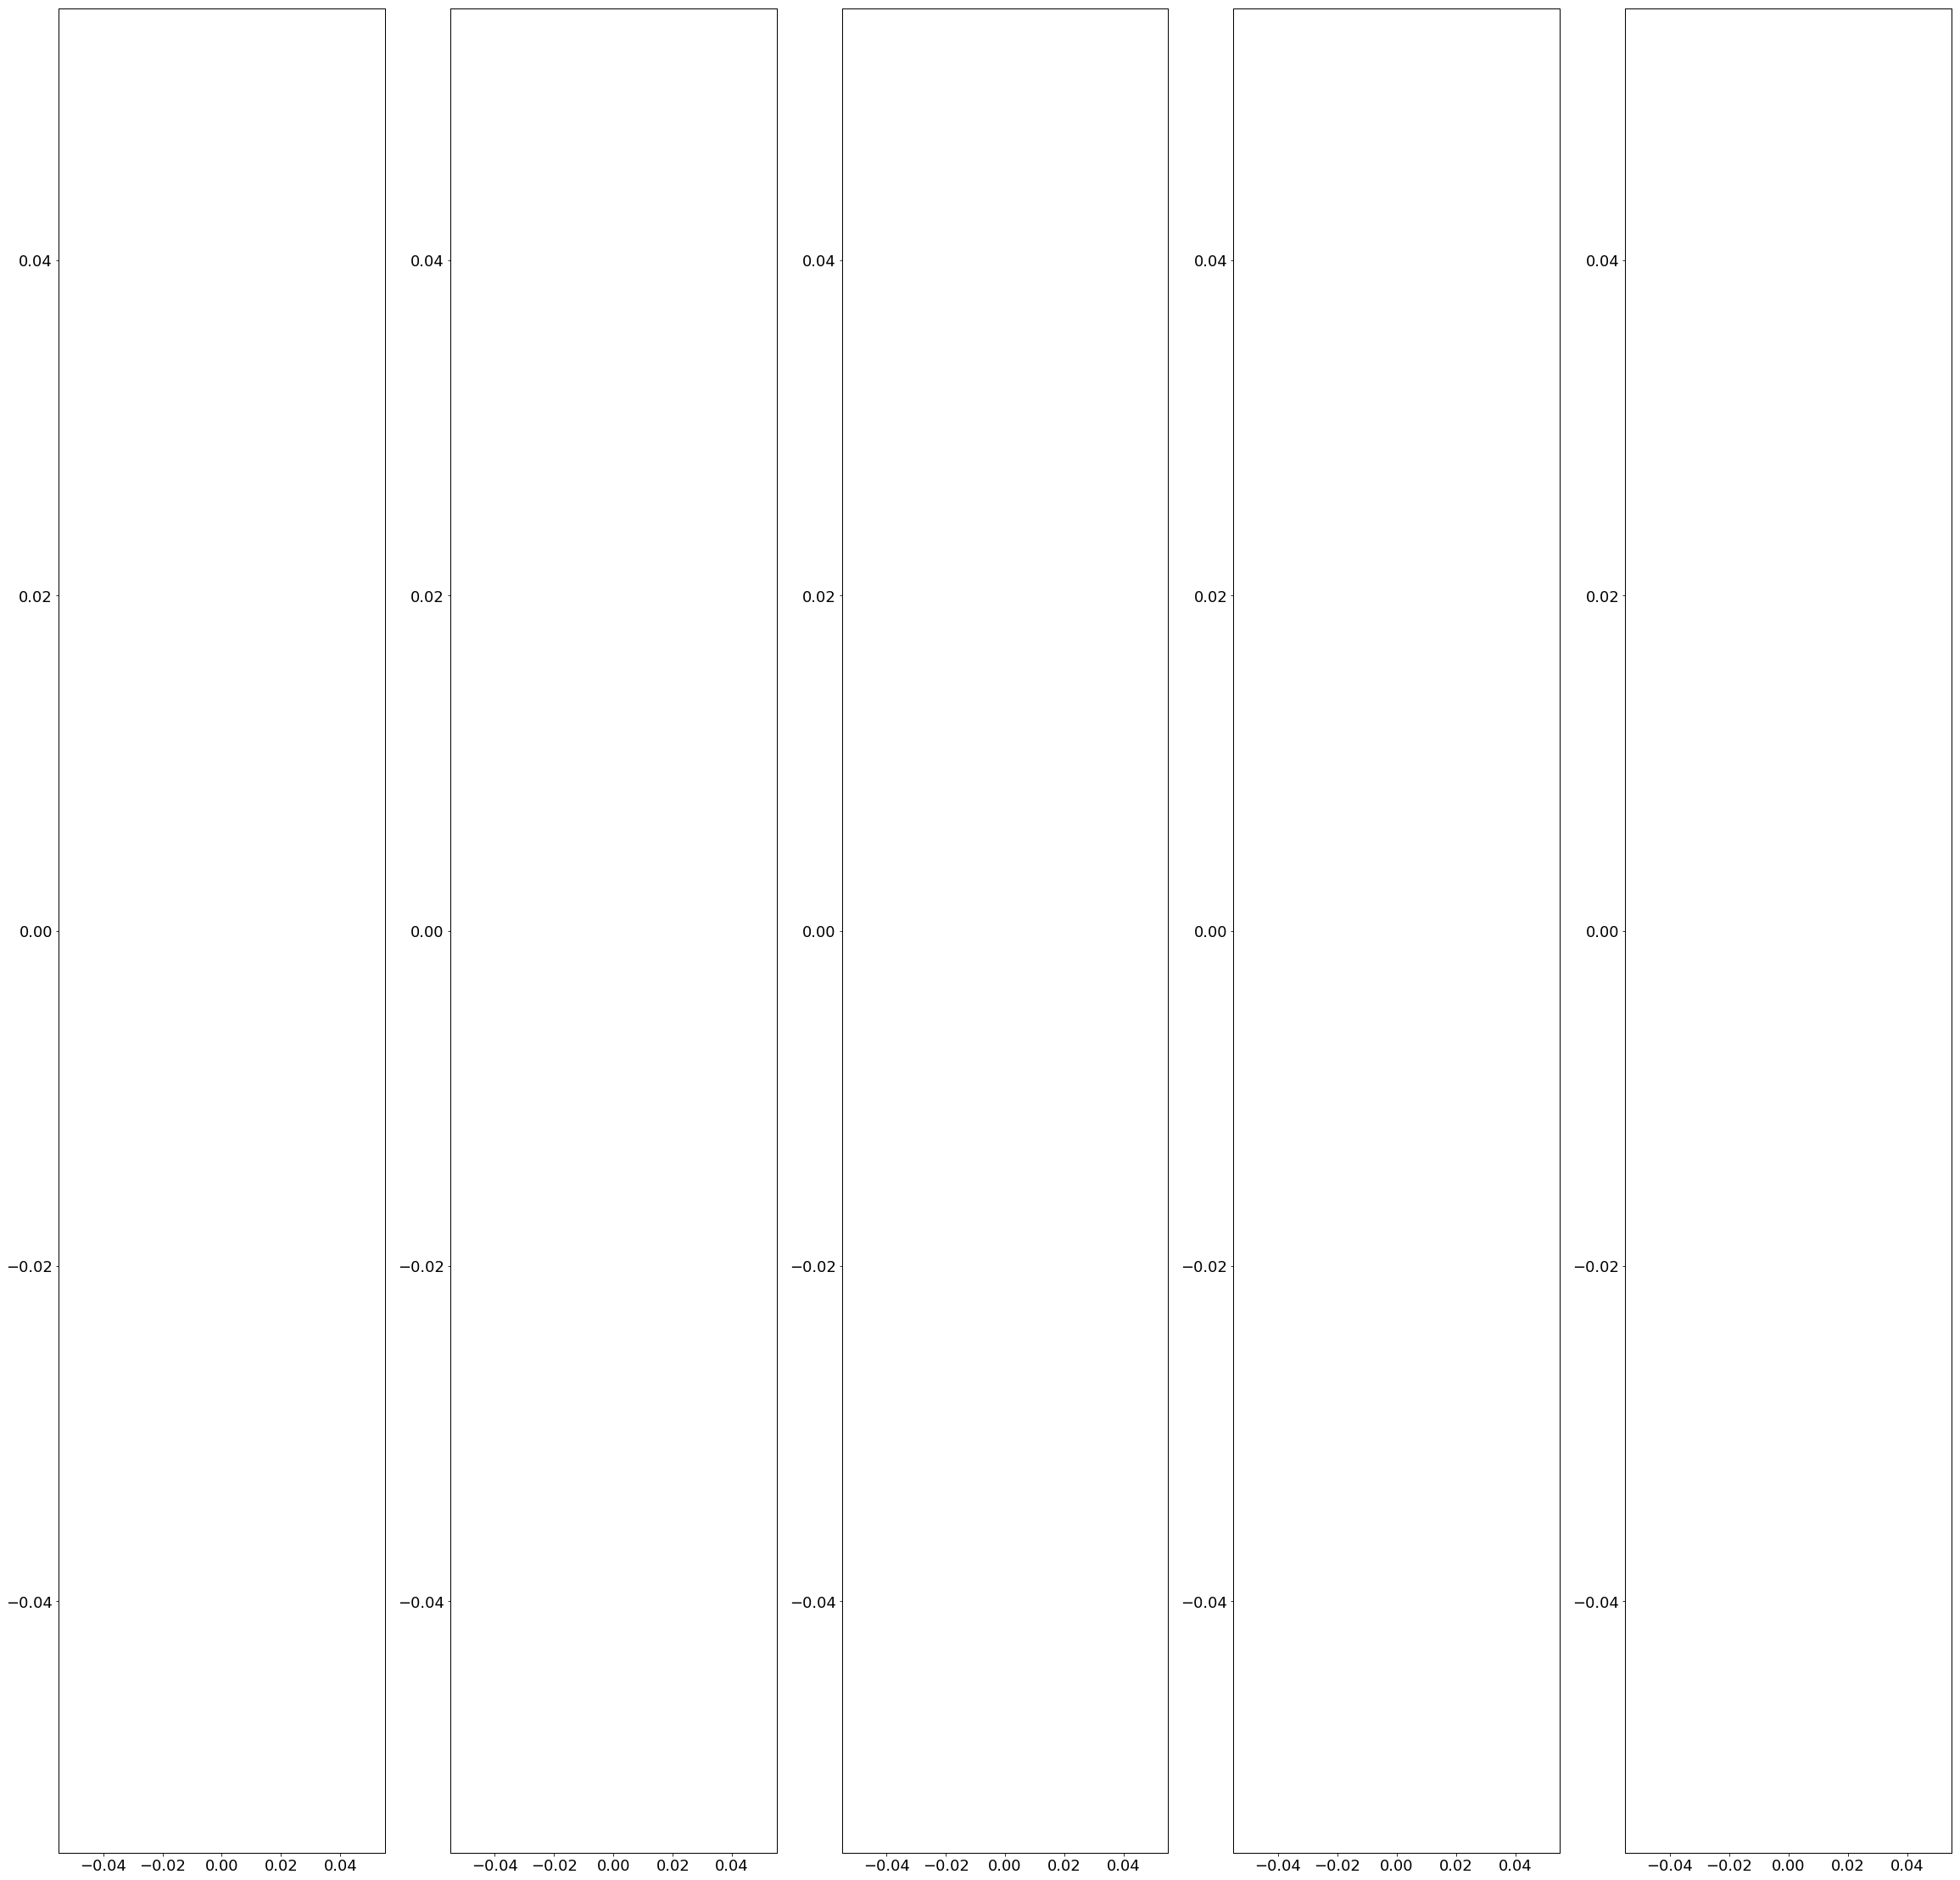

In [54]:
# Figure and subplots
fig, axs = plt.subplots(figsize=(40, 40), nrows=1, ncols=len(all_data))

# Loop over axis and data
for ax in axs:
    ax.plot()